In [353]:
import pandas as pd
import numpy as np
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder,power_transform
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [253]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [255]:
# Loan_Id attribute is of no use in prediction .As we have year also ...so we can drop date also.....we will do ths later before scaling.

In [256]:
df.shape

(614, 13)

In [257]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [258]:
df.isnull().sum().sum()

149

In [259]:
#data has 149 null values so we will handle them by fillna method by mean.
df['Gender']= df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']= df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Credit_History']= df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['LoanAmount']= df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']= df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())                                        

In [260]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [261]:
#we can clearly see that there are no null values.so we can continue with the data

In [262]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [263]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [264]:
#loan_id,Gender,married,dependents,education,self_employed,property area,loan status, are of object datatype,rest are all float64 and int64 ,we will take care of then later by encoding techniques

In [265]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [266]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.045242,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059675,0.011134
LoanAmount,0.565620,0.187828,1.000000,0.038801,-0.001431
Loan_Amount_Term,-0.045242,-0.059675,0.038801,1.000000,0.000432
Credit_History,-0.018615,0.011134,-0.001431,0.000432,1.000000


In [ ]:
ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History are 

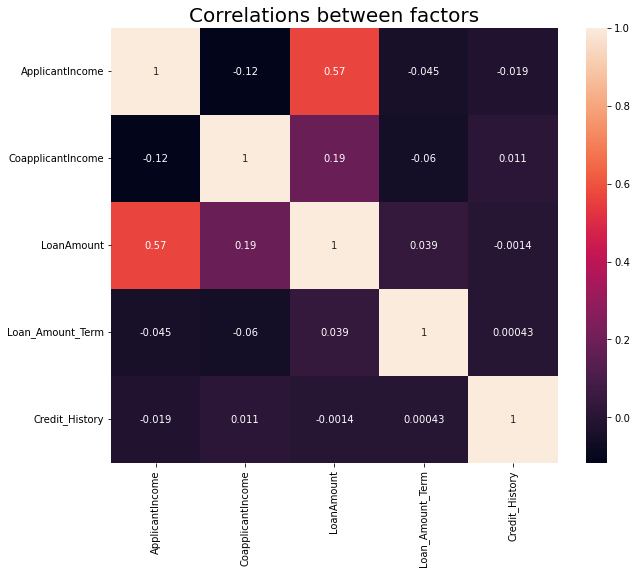

In [267]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlations between factors',fontsize=20)
plt.savefig('correlation_between _factors.jpg')
plt.show()

In [268]:
#NOW we check for skewness in data

df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
dtype: float64

In [269]:
# as we can observe there is skewness in the data .....so we tranform data into near to normally distributed data i.e. value should be near to zero.

#we are doing this by powertransformer(yeo-johnson method) to make the skew value near to zero.

In [270]:
from sklearn.preprocessing import PowerTransformer
data = df.values[:, 6:11]
# perform a yeo-johnson transform of the dataset
pt = PowerTransformer(method='yeo-johnson')
data = pt.fit_transform(data)
# convert the array back to a dataframe
pd.DataFrame(data).skew().sort_values(ascending=False)

3    0.389827
2    0.024376
0   -0.092946
1   -0.145646
4   -2.021971
dtype: float64

In [271]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [281]:
#replacing the values of categorical columns by binary values 0 and 1
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                 'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0},'Dependents':{'3+':4}},inplace=True)


In [291]:
#using label encoder for categorical target (Loan_Status) for encoding 
le=LabelEncoder()
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [299]:
le.inverse_transform([0,1])

array([0, 1], dtype=int64)

In [300]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,1,1,4,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


1    422
0    192
Name: Loan_Status, dtype: int64

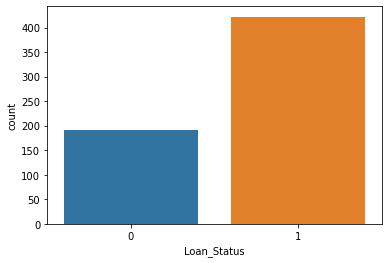

In [301]:
#now we see the count of loan status
sns.countplot(df['Loan_Status'])
df['Loan_Status'].value_counts()

In [ ]:
#loan application approved more no of times than it is rejected.....

In [302]:
correlations = df.corr()['Loan_Status'].sort_values(ascending=False)
print(correlations)

Loan_Status          1.000000
Credit_History       0.540556
Married              0.091478
Education            0.085884
Property_Area        0.032112
Gender               0.017987
Self_Employed       -0.003700
ApplicantIncome     -0.004710
Loan_Amount_Term    -0.020974
LoanAmount          -0.036416
CoapplicantIncome   -0.059187
Name: Loan_Status, dtype: float64


In [ ]:
#the attributes share positive as well as negaative correlation with the target

<AxesSubplot:>

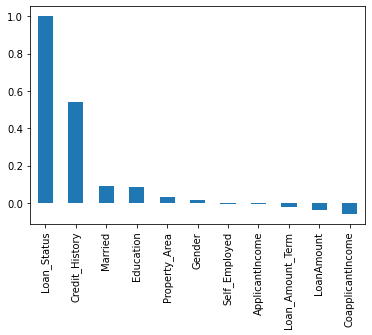

In [303]:
correlations.plot(kind='bar')

In [304]:
df.corr()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Education,-0.045364,-0.012304,1.000000,0.010383,0.140760,0.062290,0.166998,0.077242,0.073658,0.065243,0.085884
Self_Employed,-0.000525,0.004489,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974
Credit_History,0.009170,0.010938,0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556
Property_Area,-0.025752,0.004257,0.065243,-0.030860,-0.009500,0.010522,-0.044776,-0.077620,0.001963,1.000000,0.032112


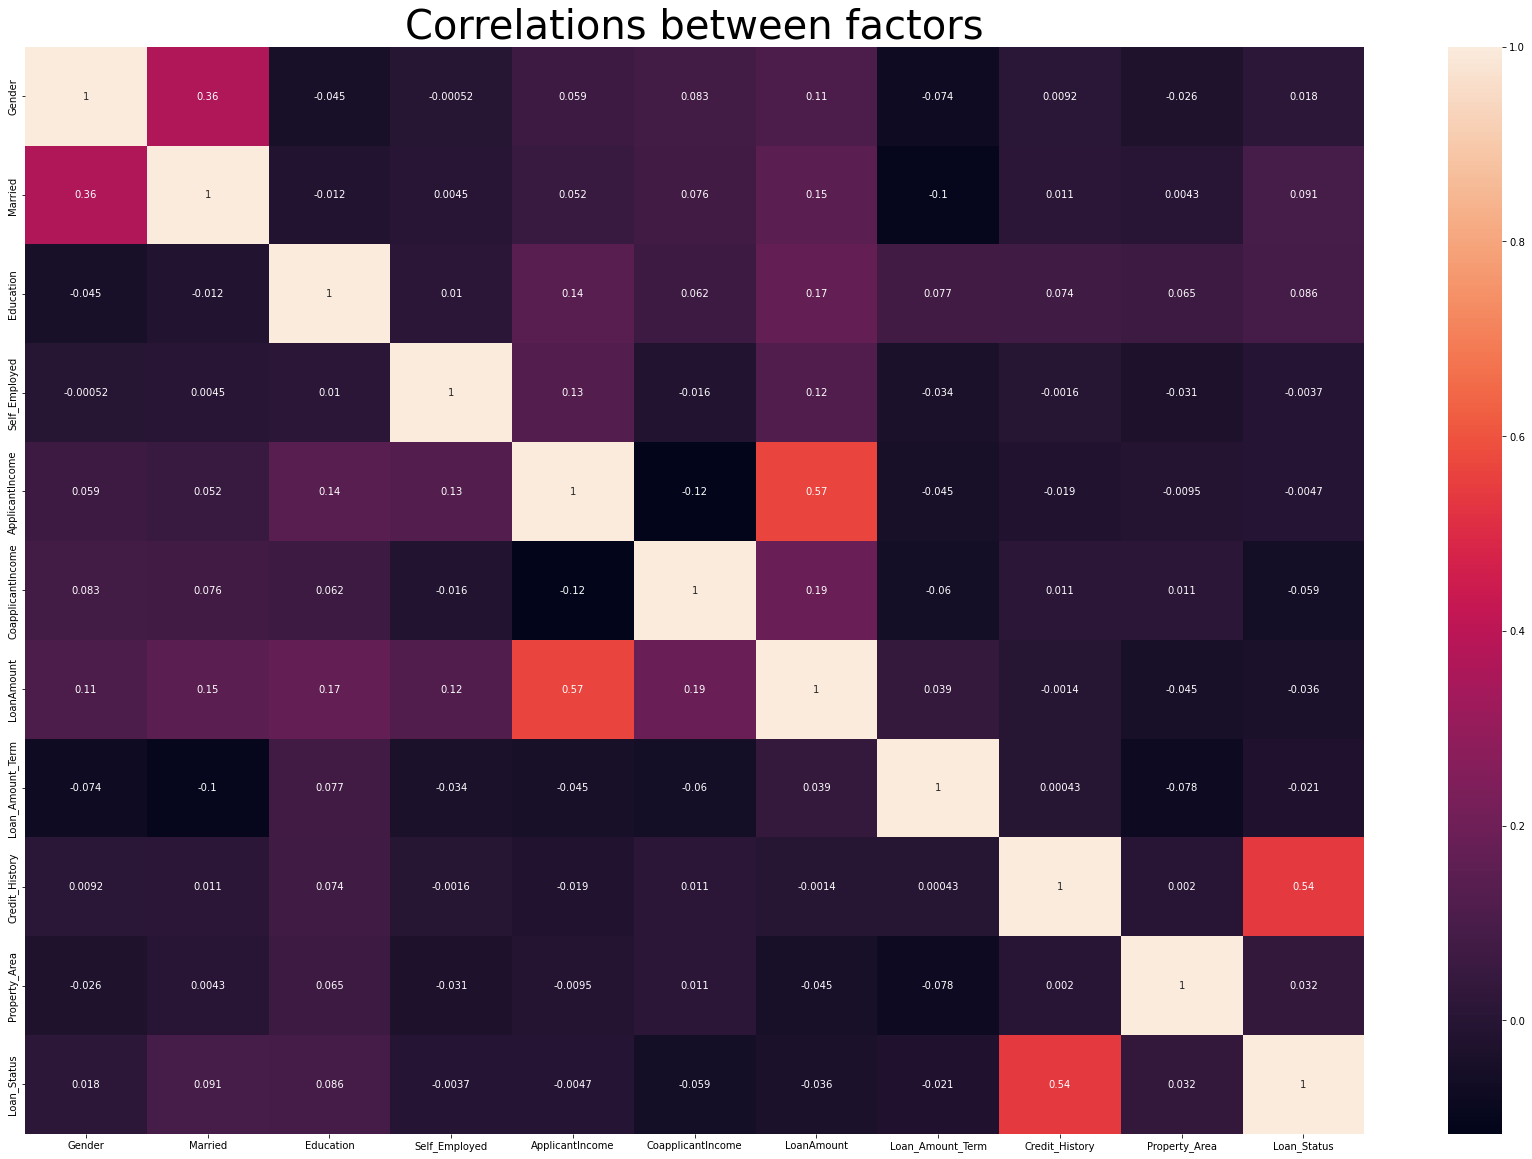

In [305]:
#this plot shows the correlation features and target with the each other
plt.figure(figsize=(30, 20))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlations between factors',fontsize=40)
plt.savefig('correlation_between _factors.jpg')
plt.show()

In [306]:
#we observeved that :
#Their is medium correlation between Loan_status and credit_history with a dimentional value of 0.54.
#Loanamount and ApplicantIncome is moderately correlated with a dimentional value of 0.57.
#Rest all the features are weakly correlated or not correlated.

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

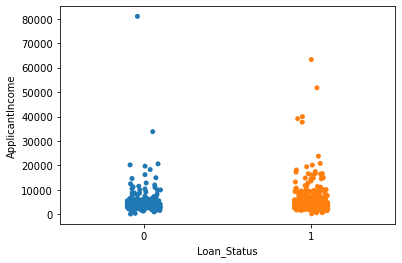

In [307]:
sns.stripplot(x='Loan_Status',y='ApplicantIncome', data=df)

In [ ]:
#the applicants who have income between  0 to 25000 have more chances of loan application approval.....

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

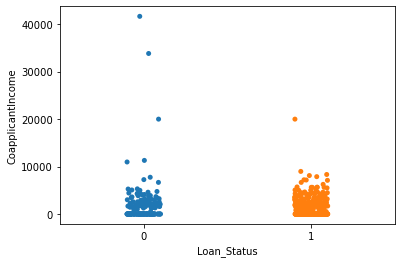

In [308]:
sns.stripplot(x='Loan_Status',y='CoapplicantIncome', data=df)

In [ ]:
#the coapplicants who have income between 0 to 10000 have more chances of loan application approval

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

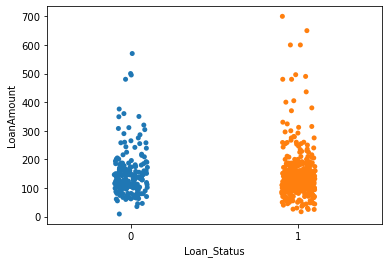

In [309]:
sns.stripplot(x='Loan_Status',y='LoanAmount', data=df)

In [351]:
#loan approval is more high in the range of 1 to 250 as compared to 250 to 700

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

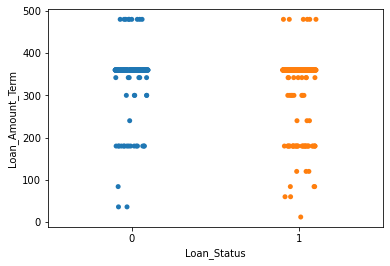

In [352]:
sns.stripplot(x='Loan_Status',y='Loan_Amount_Term', data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

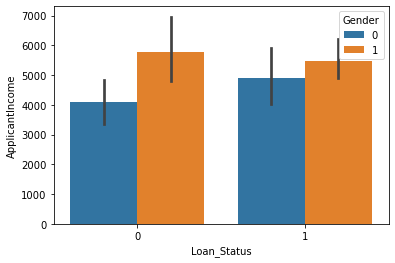

In [312]:
sns.barplot(x="Loan_Status", y="ApplicantIncome", hue="Gender", data=df)


In [ ]:
#male applicant income whose loan is approved is around 5500 whereas female applicants  income whose loan is approved  is around 4900
#male applicants whose loan is rejected have income around 5800 and females whose loan is rejected hAve income around 4000

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

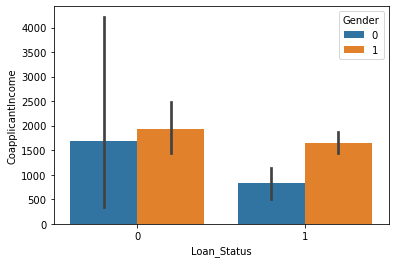

In [313]:
sns.barplot(x="Loan_Status", y="CoapplicantIncome", hue="Gender", data=df)


In [ ]:
# the coapplicant loan approval rate is low 
# female coapplicants  income whose loan is approved is around 700
#male coapplicants whose loan is approved have income between 1500


<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

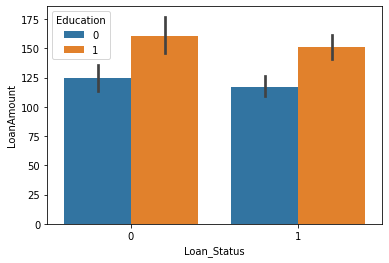

In [314]:
sns.barplot(x="Loan_Status", y="LoanAmount", hue="Education", data=df)


In [ ]:
#around 150 male are graduated  who got their loan approved
#around 125 female are graduated who got their loan approved

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

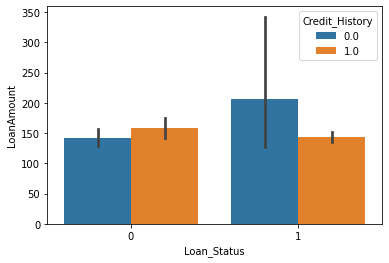

In [320]:
sns.barplot(x="Loan_Status", y="LoanAmount", hue="Credit_History", data=df)


In [ ]:
#loan amount is 200 for those have credit history 0.0 for those whose loan are approved and 150 for those whose credit hstory is 1.0

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

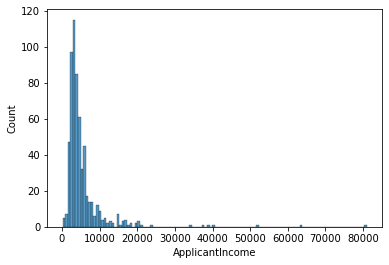

In [321]:
sns.histplot(data=df,x='ApplicantIncome')

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

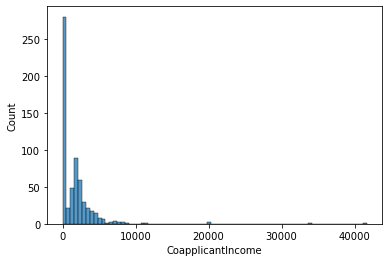

In [322]:
sns.histplot(data=df,x='CoapplicantIncome')

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

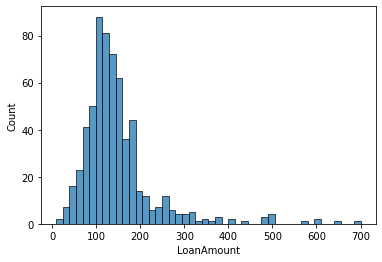

In [323]:
sns.histplot(data=df,x='LoanAmount')

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Count'>

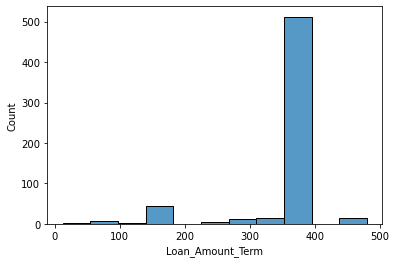

In [324]:
sns.histplot(data=df,x='Loan_Amount_Term')

In [325]:
#dropping target column and unwanted columns:
X = df.drop(columns=['Loan_Status','Loan_ID'])
y = df['Loan_Status']

In [326]:
#Data scaling Z=(X-mean)/std:

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

X_scaled.shape[1]

11

In [328]:
#now train and test split  and training and fitting test model at random state 0 so that we can find best random state:
for i in range(0,100):
    X_train,X_test,y_train,y_test =train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    reg=LogisticRegression()
    reg.fit(X_train,y_train)
    pred_train = reg.predict(X_train)
    y_pred= reg.predict(X_test)
    print(f"At random state{i},the training accuracy is:-{accuracy_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{accuracy_score(y_test,y_pred)}")
    print("\n")

At random state0,the training accuracy is:-0.8044806517311609
At random state0,the testing accuracy is:-0.8373983739837398


At random state1,the training accuracy is:-0.814663951120163
At random state1,the testing accuracy is:-0.7967479674796748


At random state2,the training accuracy is:-0.8207739307535642
At random state2,the testing accuracy is:-0.7723577235772358


At random state3,the training accuracy is:-0.8004073319755601
At random state3,the testing accuracy is:-0.8617886178861789


At random state4,the training accuracy is:-0.8167006109979633
At random state4,the testing accuracy is:-0.7967479674796748


At random state5,the training accuracy is:-0.8167006109979633
At random state5,the testing accuracy is:-0.7967479674796748


At random state6,the training accuracy is:-0.8044806517311609
At random state6,the testing accuracy is:-0.8373983739837398


At random state7,the training accuracy is:-0.8044806517311609
At random state7,the testing accuracy is:-0.8292682926829268


A

In [ ]:
#so as we can interpret random state 8 is giving best train and test accuracy,so we train our model at random state 8:

In [329]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=8)

In [330]:
X_train.shape

(491, 11)

In [331]:
y_train.shape

(491,)

In [332]:
X_test.shape

(123, 11)

In [354]:
y_test.shape

(123,)

In [ ]:
#now fitting our data to Machine learning models :

In [333]:
reg=LogisticRegression()
reg.fit(X_train,y_train)
y_pred= reg.predict(X_test)   
reg.score(X_train,y_train)
reg_score=accuracy_score(y_test,y_pred)
print('accuracy score:',reg_score*100)

regscore=cross_val_score(reg,X,y,cv=5)
lr=regscore.mean()
print('cross val score:',lr*100)

accuracy score: 88.6178861788618
cross val score: 79.64147674263627


In [340]:
svm= SVC()  
svm.fit(X_train, y_train)  
svm.score(X_train,y_train)
y_pred=svm.predict(X_test)
svm_score=accuracy_score(y_test,y_pred)
print('accuracy score:',svm_score*100)

svmscore=cross_val_score(svm,X,y,cv=5)
sv=svmscore.mean()
print('cross val score:',sv*100)

accuracy score: 73.17073170731707
cross val score: 68.72984139677463


In [334]:
knc= KNeighborsClassifier()  
knc.fit(X_train, y_train)  
knc.score(X_train,y_train)
y_pred=knc.predict(X_test)
knc_score=accuracy_score(y_test,y_pred)
print('accuracy score:',knc_score*100)

kncscore=cross_val_score(knc,X,y,cv=5)
kn=kncscore.mean()
print('cross val score:',kn*100)

accuracy score: 60.97560975609756
cross val score: 61.56337465013995


In [335]:
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred=dt.predict(X_test)
dts=accuracy_score(y_test,y_pred)
print('accuracy score:',dts*100)

dtscore=cross_val_score(dt,X,y,cv=5)
dtc=dtscore.mean()
print('cross val score:',dtc*100)

accuracy score: 73.17073170731707
cross val score: 71.82593629214982


In [337]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_train,y_train)
y_pred=rf.predict(X_test)
rfs=accuracy_score(y_test,y_pred)
print('accuracy score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

accuracy score: 88.6178861788618
cross val score: 78.66453418632547


In [ ]:
#so according to dataset  LogisticRegression and Randomforestclassifier is getting best accuracy of 88%
#we will go ahead with RandomForestClassifier
#now we do gridsearcv hyperparametertuning on this algorithm

In [341]:
grid_parameters ={'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"],'max_depth':[4,5,6,7,8],'bootstrap': [True],
 'min_samples_leaf':[1]}
clf=GridSearchCV(rf,grid_parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1}


In [342]:
rf=RandomForestClassifier(bootstrap='True',criterion= 'entropy',max_features='log2',max_depth=5, max_leaf_nodes=None, min_samples_leaf= 1)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
y_pred=rf.predict(X_test)
rfs=accuracy_score(y_test,y_pred)
print('accuracy score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

accuracy score: 88.6178861788618
cross val score: 80.78368652538984


In [343]:
#model accuracy
accuracy=accuracy_score(y_pred,y_test)
accuracy

0.8861788617886179

In [344]:
#confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[19, 14],
       [ 0, 90]], dtype=int64)

              precision    recall  f1-score   support

           0       1.00      0.58      0.73        33
           1       0.87      1.00      0.93        90

    accuracy                           0.89       123
   macro avg       0.93      0.79      0.83       123
weighted avg       0.90      0.89      0.87       123



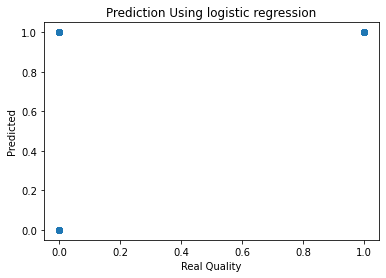

In [345]:
print(classification_report(y_test,y_pred))

plt.scatter(y_test,y_pred)
plt.title("Prediction Using logistic regression")
plt.xlabel("Real Quality")
plt.ylabel("Predicted")
plt.show()

In [347]:
type(clf)

sklearn.model_selection._search.GridSearchCV

In [348]:
clf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2')

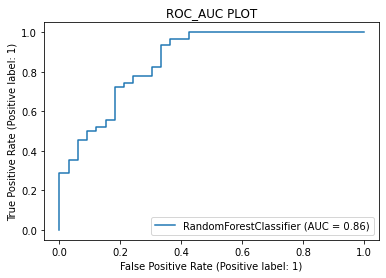

In [349]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf.best_estimator_,X_test,y_test)
plt.title("ROC_AUC PLOT")
plt.show()

In [ ]:
#the best model is RandomForestclassifier with 88% accuracy and 80% cross validation score and ROC-AUC-SCORE=0.86

In [350]:
#saving the model to local file system
filename='loan application status_model.pickle'
pickle.dump(rf,open(filename,'wb'))